In [23]:
pip install pydicom

Note: you may need to restart the kernel to use updated packages.


In [36]:
import pandas as pd
import numpy as np
# from google.colab import drive
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#import pydicom as dicom
from PIL import Image
from PIL import ImageTk
from glob import glob
import re

In [37]:
## Read-in datasets
annotations = pd.read_csv(r'C:\Users\jssuz\OneDrive\Desktop\grad_school_files\capstone\Dataset_B_Subset\finding_annotations.csv')

In [4]:
# # Import annotations dataset
# annotations = pd.read_csv('/content/drive/MyDrive/498_Capstone/Research/Dataset_B_Subset/finding_annotations.csv')

In [38]:
annotations.head()

,study_id,series_id,image_id,laterality,view_position,height,width,breast_birads,breast_density,finding_categories,finding_birads,xmin,ymin,xmax,ymax,split
0,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,4e3a578fe535ea4f5258d3f7f4419db8,R,CC,3518,2800,BI-RADS 4,DENSITY C,['Mass'],BI-RADS 4,2355.139893,1731.640015,2482.979980,1852.750000,training
1,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,dac39351b0f3a8c670b7f8dc88029364,R,MLO,3518,2800,BI-RADS 4,DENSITY C,['Mass'],BI-RADS 4,2386.679932,1240.609985,2501.800049,1354.040039,training
2,75e8e48933289d70b407379a564f8594,853b70e7e6f39133497909d9ca4c756d,c83f780904f25eacb44e9030f32c66e1,R,CC,3518,2800,BI-RADS 3,DENSITY C,['Global Asymmetry'],BI-RADS 3,2279.179932,1166.510010,2704.439941,2184.260010,training
3,75e8e48933289d70b407379a564f8594,853b70e7e6f39133497909d9ca4c756d,893528bc38a0362928a89364f1b692fd,R,MLO,3518,2800,BI-RADS 3,DENSITY C,['Global Asymmetry'],BI-RADS 3,1954.270020,1443.640015,2589.760010,2193.810059,training
4,c3487424fee1bdd4515b72dc3fd69813,77619c914263eae44e9099f1ce07192c,318264c881bf12f2c1efe5f93920cc37,R,CC,3518,2800,BI-RADS 4,DENSITY C,['Architectural Distortion'],BI-RADS 4,2172.300049,1967.410034,2388.699951,2147.159912,training


In [39]:
# Import All Images
import glob
image_path_list = glob.glob(r"C:\Users\jssuz\OneDrive\Desktop\grad_school_files\capstone\Dataset_B_Subset\Images\**\*.dicom")
image_path_list

['C:\\Users\\jssuz\\OneDrive\\Desktop\\grad_school_files\\capstone\\Dataset_B_Subset\\Images\\00a369b4ec1e5e0ff34e6bd838e5f2d6\\2feab51140b38f9ec90e17b7006501b2.dicom',
 'C:\\Users\\jssuz\\OneDrive\\Desktop\\grad_school_files\\capstone\\Dataset_B_Subset\\Images\\00a369b4ec1e5e0ff34e6bd838e5f2d6\\b70e49d5e28ad1ac33920a9b641c7b8f.dicom',
 'C:\\Users\\jssuz\\OneDrive\\Desktop\\grad_school_files\\capstone\\Dataset_B_Subset\\Images\\00a369b4ec1e5e0ff34e6bd838e5f2d6\\e851ee79457fd5251b630a54ec061cad.dicom',
 'C:\\Users\\jssuz\\OneDrive\\Desktop\\grad_school_files\\capstone\\Dataset_B_Subset\\Images\\00a369b4ec1e5e0ff34e6bd838e5f2d6\\f3cbed97f4bb7897467e1e8bab45966e.dicom',
 'C:\\Users\\jssuz\\OneDrive\\Desktop\\grad_school_files\\capstone\\Dataset_B_Subset\\Images\\00a7a306c763ab5f0cb6a846825b7d04\\274942d5c9036c89aca0b16a36d2b076.dicom',
 'C:\\Users\\jssuz\\OneDrive\\Desktop\\grad_school_files\\capstone\\Dataset_B_Subset\\Images\\00a7a306c763ab5f0cb6a846825b7d04\\2ce50597d3a7711d30b9ec3a0aa

DEFINE FUNCTIONS

In [40]:
import pydicom
from PIL import Image

# No re-sizing
def get_dicom(filepath):
    # Load the DICOM file
    dicom = pydicom.dcmread(filepath)

    # Extract pixel data from the DICOM object
    pixel_data = dicom.pixel_array

    # Convert the pixel data to an image using PIL
    image = Image.fromarray(pixel_data)

    # No resizing needed, keep the image in the original size

    # Convert the image back to a numpy array
    original_pixel_data = np.array(image)

    # Update the DICOM object with the original pixel data
    dicom.PixelData = original_pixel_data.tobytes()
    dicom.Rows, dicom.Columns = original_pixel_data.shape

    return dicom

In [41]:
def resize_dicom(filepath, size):
    # Load the DICOM file
    dicom = pydicom.dcmread(filepath)

    # Extract pixel data from the DICOM object
    pixel_data = dicom.pixel_array

    # Convert the pixel data to an image using PIL
    image = Image.fromarray(pixel_data)

    # Resize the image to the desired size
    image = image.resize(size)

    # Convert the resized image back to a numpy array
    resized_pixel_data = np.array(image)

    # Update the DICOM object with the resized pixel data
    dicom.PixelData = resized_pixel_data.tobytes()
    dicom.Rows, dicom.Columns = resized_pixel_data.shape

    return dicom

In [42]:
## Returns the x-y coordinates to each respective tree.

# def find_coordinates(image_id):

#     annotations_sub = annotations[annotations['image_id'] == image_id]

#     if len(annotations_sub) == 0:
#         print("Image ID not Found:" , image_id)
    
#     else:
#         x1 =  annotations_sub.iloc[0,11]
#         y1 =  annotations_sub.iloc[0,12]
#         x2 =  annotations_sub.iloc[0,13]
#         y2 =  annotations_sub.iloc[0,14]

#     return x1,x2,y1,y2

def find_coordinates(image_id):
    annotations_sub = annotations[annotations['image_id'] == image_id]

    x1, x2, y1, y2 = None, None, None, None  # Set default values

    if len(annotations_sub) == 0:
        print("Image ID not Found:", image_id)
    else:
        x1 = annotations_sub.iloc[0, 11]
        y1 = annotations_sub.iloc[0, 12]
        x2 = annotations_sub.iloc[0, 13]
        y2 = annotations_sub.iloc[0, 14]

    return x1, x2, y1, y2

In [43]:
def extract_image_id(image_file_path):

    file_path = r"C:\Users\jssuz\OneDrive\Desktop\grad_school_files\capstone\Dataset_B_Subset\Images"

    # Define a regex pattern to match the last ID before ".dicom"
    pattern = r"/(\w+)\.dicom$"

    # Use re.search to find the match in the file path
    match = re.search(pattern, file_path)

    # Extract the matched ID
    if match:
        last_id = match.group(1)
        print(last_id)
    else:
        print("No match found.")

    return match

In [44]:
import pydicom
import numpy as np

def crop_dicom(images_filepath, coordinates):
    # Load DICOM file
    dicom_data = pydicom.dcmread(images_filepath)

    # Extract pixel array from DICOM
    pixel_array = dicom_data.pixel_array

    # Crop the image based on coordinates
    x1, y1, x2, y2 = coordinates
    cropped_array = pixel_array[y1:y2, x1:x2]

    image_id = m.split("\\")[-1]
#     image_id = m.rsplit("\\", 1)[-1]
    image_id = image_id.split(".")[0]

    # Update DICOM attributes (optional)
    dicom_data.Rows, dicom_data.Columns = cropped_array.shape
    index = images_filepath.find(".dicom")
    
    ## Need to adjust this file path to be local.
#     output_path = 'C:\\Users\\jssuz\\OneDrive\\Desktop\\grad_school_files\\capstone\\Dataset_B_Subset\\output_cropped_images'
#     output_path = 'C:\\Users\\jssuz\\OneDrive\\Desktop\\output_cropped_images.dicom'
#     output_path = 'C:\\Users\\jssuz\\OneDrive\\Desktop' + image_id + '.dicom'
#     output_path = 'C:\\Users\\jssuz\\OneDrive\\Desktop\\grad_school_files\\capstone\\Dataset_B_Subset\\output_cropped_images' + image_id + images_filepath[index:]
    output_path = r"C:\Users\jssuz\OneDrive\Desktop\grad_school_files\capstone\Dataset_B_Subset\output_cropped_images\\" + image_id + ".dicom"

    # Save the cropped DICOM file
    dicom_data.Rows, dicom_data.Columns = cropped_array.shape
    dicom_data.PixelData = cropped_array.tobytes()
    dicom_data.save_as(output_path)

    return dicom_data


Make Dataframe, left joined on images in folder

In [45]:
# Create dataframe with image file path and coordinates
pd.set_option('display.max_colwidth', None)

data = []

for m in image_path_list:
    
    ## Removes '.dicom' extension at the end of each file.
    image_id = m.split("\\")[-1]
#     image_id = m.rsplit("\\", 1)[-1]
    image_id = image_id.split(".")[0]
#     data.append(image_id)
    coordinates = find_coordinates(image_id)
    data.append({'ImageID': image_id, 'X1': coordinates[0], 'Y1': coordinates[1], 'X2': coordinates[2], 'Y2': coordinates[3], 'ImagePath': m})

df = pd.DataFrame(data)

df

,ImageID,X1,Y1,X2,Y2,ImagePath
0,2feab51140b38f9ec90e17b7006501b2,187.735001,476.61499,1143.689941,1469.52002,C:\Users\jssuz\OneDrive\Desktop\grad_school_files\capstone\Dataset_B_Subset\Images\00a369b4ec1e5e0ff34e6bd838e5f2d6\2feab51140b38f9ec90e17b7006501b2.dicom
1,b70e49d5e28ad1ac33920a9b641c7b8f,NaN,NaN,NaN,NaN,C:\Users\jssuz\OneDrive\Desktop\grad_school_files\capstone\Dataset_B_Subset\Images\00a369b4ec1e5e0ff34e6bd838e5f2d6\b70e49d5e28ad1ac33920a9b641c7b8f.dicom
2,e851ee79457fd5251b630a54ec061cad,NaN,NaN,NaN,NaN,C:\Users\jssuz\OneDrive\Desktop\grad_school_files\capstone\Dataset_B_Subset\Images\00a369b4ec1e5e0ff34e6bd838e5f2d6\e851ee79457fd5251b630a54ec061cad.dicom
3,f3cbed97f4bb7897467e1e8bab45966e,NaN,NaN,NaN,NaN,C:\Users\jssuz\OneDrive\Desktop\grad_school_files\capstone\Dataset_B_Subset\Images\00a369b4ec1e5e0ff34e6bd838e5f2d6\f3cbed97f4bb7897467e1e8bab45966e.dicom
4,274942d5c9036c89aca0b16a36d2b076,NaN,NaN,NaN,NaN,C:\Users\jssuz\OneDrive\Desktop\grad_school_files\capstone\Dataset_B_Subset\Images\00a7a306c763ab5f0cb6a846825b7d04\274942d5c9036c89aca0b16a36d2b076.dicom
5,2ce50597d3a7711d30b9ec3a0aa25623,NaN,NaN,NaN,NaN,C:\Users\jssuz\OneDrive\Desktop\grad_school_files\capstone\Dataset_B_Subset\Images\00a7a306c763ab5f0cb6a846825b7d04\2ce50597d3a7711d30b9ec3a0aa25623.dicom
6,6c4c8ea04f9fd60b26e6480d988c1e58,NaN,NaN,NaN,NaN,C:\Users\jssuz\OneDrive\Desktop\grad_school_files\capstone\Dataset_B_Subset\Images\00a7a306c763ab5f0cb6a846825b7d04\6c4c8ea04f9fd60b26e6480d988c1e58.dicom
7,c7ae763953bfd86e922d9259e2c7afc7,NaN,NaN,NaN,NaN,C:\Users\jssuz\OneDrive\Desktop\grad_school_files\capstone\Dataset_B_Subset\Images\00a7a306c763ab5f0cb6a846825b7d04\c7ae763953bfd86e922d9259e2c7afc7.dicom
8,1095b6e3fd733c527a98c2ee2df95e5c,NaN,NaN,NaN,NaN,C:\Users\jssuz\OneDrive\Desktop\grad_school_files\capstone\Dataset_B_Subset\Images\00ba2f2c0cd9a34af770eb252f3a56ce\1095b6e3fd733c527a98c2ee2df95e5c.dicom
9,15e2d481fa5cc8df2dd0a8a93b766e53,NaN,NaN,NaN,NaN,C:\Users\jssuz\OneDrive\Desktop\grad_school_files\capstone\Dataset_B_Subset\Images\00ba2f2c0cd9a34af770eb252f3a56ce\15e2d481fa5cc8df2dd0a8a93b766e53.dicom


In [141]:
# annotations[annotations['image_id'] == '2feab51140b38f9ec90e17b7006501b2']

In [16]:
print(len(df))

40


In [17]:
df

,ImageID,X1,Y1,X2,Y2,ImagePath
0,2feab51140b38f9ec90e17b7006501b2,187.735001,476.61499,1143.689941,1469.52002,C:\Users\jssuz\OneDrive\Desktop\grad_school_files\capstone\Dataset_B_Subset\Images\00a369b4ec1e5e0ff34e6bd838e5f2d6\2feab51140b38f9ec90e17b7006501b2.dicom
1,b70e49d5e28ad1ac33920a9b641c7b8f,NaN,NaN,NaN,NaN,C:\Users\jssuz\OneDrive\Desktop\grad_school_files\capstone\Dataset_B_Subset\Images\00a369b4ec1e5e0ff34e6bd838e5f2d6\b70e49d5e28ad1ac33920a9b641c7b8f.dicom
2,e851ee79457fd5251b630a54ec061cad,NaN,NaN,NaN,NaN,C:\Users\jssuz\OneDrive\Desktop\grad_school_files\capstone\Dataset_B_Subset\Images\00a369b4ec1e5e0ff34e6bd838e5f2d6\e851ee79457fd5251b630a54ec061cad.dicom
3,f3cbed97f4bb7897467e1e8bab45966e,NaN,NaN,NaN,NaN,C:\Users\jssuz\OneDrive\Desktop\grad_school_files\capstone\Dataset_B_Subset\Images\00a369b4ec1e5e0ff34e6bd838e5f2d6\f3cbed97f4bb7897467e1e8bab45966e.dicom
4,274942d5c9036c89aca0b16a36d2b076,NaN,NaN,NaN,NaN,C:\Users\jssuz\OneDrive\Desktop\grad_school_files\capstone\Dataset_B_Subset\Images\00a7a306c763ab5f0cb6a846825b7d04\274942d5c9036c89aca0b16a36d2b076.dicom
5,2ce50597d3a7711d30b9ec3a0aa25623,NaN,NaN,NaN,NaN,C:\Users\jssuz\OneDrive\Desktop\grad_school_files\capstone\Dataset_B_Subset\Images\00a7a306c763ab5f0cb6a846825b7d04\2ce50597d3a7711d30b9ec3a0aa25623.dicom
6,6c4c8ea04f9fd60b26e6480d988c1e58,NaN,NaN,NaN,NaN,C:\Users\jssuz\OneDrive\Desktop\grad_school_files\capstone\Dataset_B_Subset\Images\00a7a306c763ab5f0cb6a846825b7d04\6c4c8ea04f9fd60b26e6480d988c1e58.dicom
7,c7ae763953bfd86e922d9259e2c7afc7,NaN,NaN,NaN,NaN,C:\Users\jssuz\OneDrive\Desktop\grad_school_files\capstone\Dataset_B_Subset\Images\00a7a306c763ab5f0cb6a846825b7d04\c7ae763953bfd86e922d9259e2c7afc7.dicom
8,1095b6e3fd733c527a98c2ee2df95e5c,NaN,NaN,NaN,NaN,C:\Users\jssuz\OneDrive\Desktop\grad_school_files\capstone\Dataset_B_Subset\Images\00ba2f2c0cd9a34af770eb252f3a56ce\1095b6e3fd733c527a98c2ee2df95e5c.dicom
9,15e2d481fa5cc8df2dd0a8a93b766e53,NaN,NaN,NaN,NaN,C:\Users\jssuz\OneDrive\Desktop\grad_school_files\capstone\Dataset_B_Subset\Images\00ba2f2c0cd9a34af770eb252f3a56ce\15e2d481fa5cc8df2dd0a8a93b766e53.dicom


In [18]:
df[df['X1'].isna()==False]

,ImageID,X1,Y1,X2,Y2,ImagePath
0,2feab51140b38f9ec90e17b7006501b2,187.735001,476.61499,1143.689941,1469.52002,C:\Users\jssuz\OneDrive\Desktop\grad_school_files\capstone\Dataset_B_Subset\Images\00a369b4ec1e5e0ff34e6bd838e5f2d6\2feab51140b38f9ec90e17b7006501b2.dicom


Export dicom images - original, re-sized, and cropped

In [22]:
for i, row in df.iterrows():

    if pd.notna(row['X1']):

        print(row['ImagePath'])

        orig_dicom = get_dicom(image_path_list[1])
        resized_dicom = resize_dicom(image_path_list[1], (299,299))
        cropped_dicom = crop_dicom(row['ImagePath'], (int(row['X1']), int(row['X2']), int(row['Y1']), int(row['Y2'])) )

C:\Users\jssuz\OneDrive\Desktop\grad_school_files\capstone\Dataset_B_Subset\Images\00a369b4ec1e5e0ff34e6bd838e5f2d6\2feab51140b38f9ec90e17b7006501b2.dicom


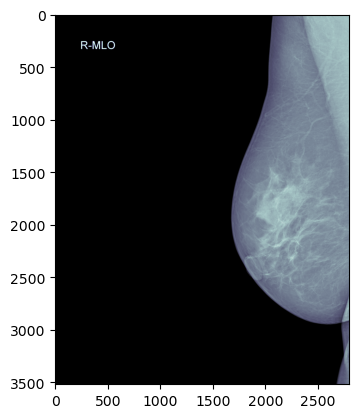

In [159]:
plt.imshow(orig_dicom.pixel_array, cmap=plt.cm.bone)

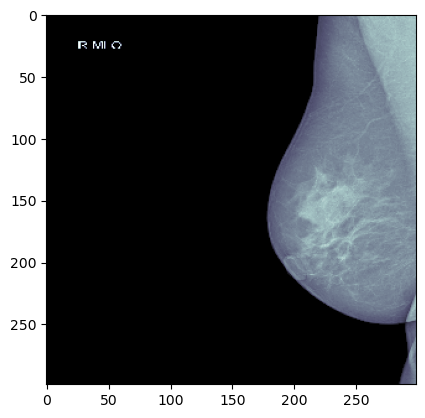

In [160]:
plt.imshow(resized_dicom.pixel_array, cmap=plt.cm.bone)

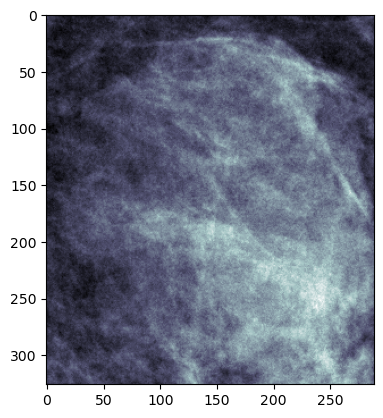

In [161]:
plt.imshow(cropped_dicom.pixel_array, cmap=plt.cm.bone)